Atividade 03 da disciplina de Visão Robótica

Discente: Henrique Antônio Guanais Corneau

# Remoção de ruído

1. Implemente uma função para contaminar uma imagem com ruído
salt and pepper de acordo com uma probabilidade 𝑝 de um pixel
específico ser contaminado por ruído, e uma chance igual de o ruído
ser um pixel branco (255) ou preto (0)
2. Contamine uma imagem com ruido salt and pepper

Para implementar essa função, primeiramente irá ser feito a cópia da imagem com `img2 = img.copy()`, para que a imagem original não seja afetada.

Após isso, a imagem será percorrida em cada pixel, se um número aleatório gerado com `random.random()` for menor que a probabilidade informada, então o pixel será contaminado. 

Logo em seguida, se outro mesmo número aleatório estiver entre 0 e 0.5, o pixel será preto, caso contrário será branco.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

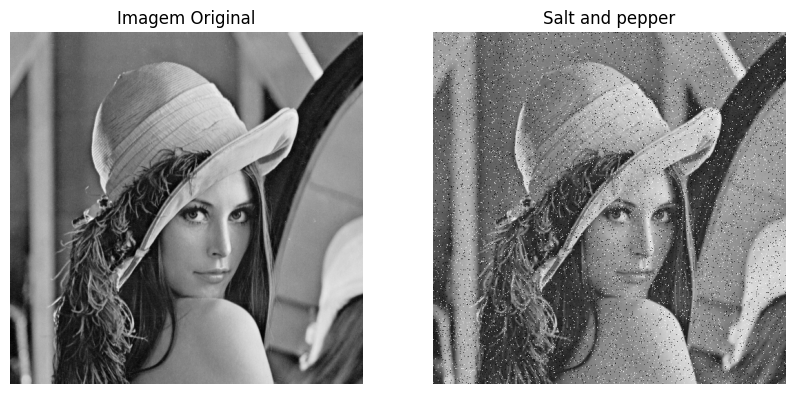

In [3]:
# adiciona ruido salt and pepper, com a probabilidade p do pixel ser contaminado
def salt_and_pepper(img, p):
    img2 = img.copy()
    for i in range(img2.shape[0]):
        for j in range(img2.shape[1]):
            if random.random() < p:
                if random.random() < 0.5:
                    img2[i, j] = 0
                else:
                    img2[i, j] = 255
    return img2

img_path = 'imagens/Lenna.png'
img = cv2.imread(img_path)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
probabilidade = 0.05

noisy_image = salt_and_pepper(gray_image, probabilidade)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Salt and pepper')
plt.axis('off')
plt.show()


3. Implemente e utilize o filtro da mediana e filtre a imagem ruidosa.
Varie o tamanho da janela. O que acontece se aumentarmos muito
o seu tamanho?

Para isso, foi criada a função `filtro_mediana()`, em que vão ser percorridos os pixels da imagem, e cada pixel será o valor da mediana da janela de tamanho `size`, para isso, é utilizado a função `np.median()`.

Com base nos resultados, é possível perceber que esse filtro funciona muito bem para eliminar o ruído salt and pepper. Ao aumentar o tamanho da janela, pode-se perceber que o ruído reduz, porém o efeito blur da imagem aumenta.


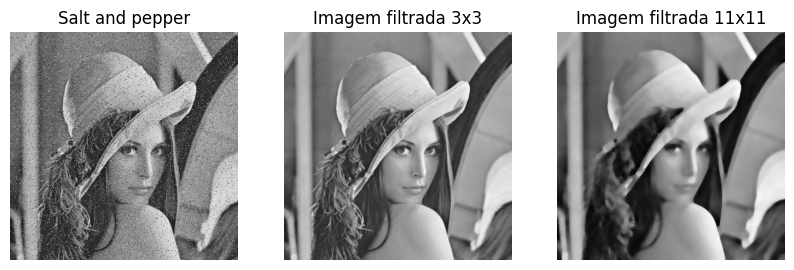

In [9]:
# funcao que aplica um filtro de mediana na imagem
def filtro_mediana(img, size):
    img2 = img.copy()

    for i in range(img2.shape[0]):
        for j in range(img.shape[1]):
            img2[i, j] = np.median(img[i:i+size, j:j+size].flatten())

    return img2

n1 = 3
n2 = 11

img_filtrada1 = filtro_mediana(noisy_image, n1)
img_filtrada2 = filtro_mediana(noisy_image, n2)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Salt and pepper')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_filtrada1, cmap='gray')
plt.title('Imagem filtrada 3x3')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_filtrada2, cmap='gray')
plt.title('Imagem filtrada 11x11')
plt.axis('off')
plt.show()

4. Utilize o filtro gaussiano para filtrar a imagem ruidosa. Também
varie o tamanho da janela

Para isso, primeiro será criado a função `filtro_espacial()`, essa função tem o objetivo de realizar a convolução do kernel `k`, com uma região da imagem, em que isso está sendo realizado nessas linhas:
```
for i in range(llin, img.shape[0] - llin):
        for j in range(lcol, img.shape[1] - lcol):
            region = img[i - llin:i + llin + 1, j - lcol:j + lcol + 1]
            img2[i, j] = np.sum(region * k)
```
Após isso, serão definidos os kernels do filtro gaussiano. Para o cálculo do kernel, foi feita a função `gaussian_kernel()`, em que o kernel terá valores de acordo com a função gaussiana: `k * np.exp(-(m**2 + n**2)/(2*sigma**2))`, com base nos parâmetros `k`e `sigma`.




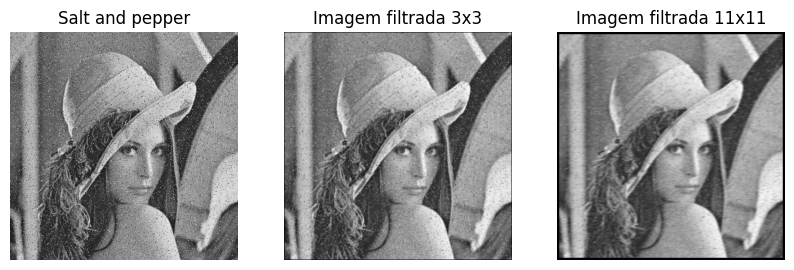

In [10]:
# funcao que aplica um filtro espacial na imagem
def filtro_espacial(img, k):
    img2 = np.zeros_like(img, dtype=np.float32)
    lk = k.shape[0] 
    ck = k.shape[1] 
    llin = int(lk/2) 
    lcol = int(ck/2)
    
    # realiza a convolucao entre o kernel k e a imagem na regiao
    for i in range(llin, img.shape[0] - llin):
        for j in range(lcol, img.shape[1] - lcol):
            region = img[i - llin:i + llin + 1, j - lcol:j + lcol + 1]
            img2[i, j] = np.sum(region * k)

    return img2
# kernel 3x3 de filtro gaussiano
k1 = [[0.3679, 0.6065, 0.3679],
     [0.6065, 1, 0.6065],
     [0.3679, 0.6065, 0.3679]]
k1 = np.array(k1)/4.8905

# funcao que cria um kernel gaussiano, com os parametros k e sigma, de tamanho size
def gaussian_kernel(size, k, sigma):
    kernel = np.zeros((size,size))
    llin = int(size/2) 
    lcol = llin 
    for m in range(-llin, llin+1):
        for n in range(-lcol, lcol+1):
            kernel[m+llin, n+lcol] = k * np.exp(-(m**2 + n**2)/(2*sigma**2))
            kernel = kernel/np.sum(kernel)
    return kernel

k2 = gaussian_kernel(11, 1, 2)
img_filtrada1 = filtro_espacial(noisy_image, k1)
img_filtrada2 = filtro_espacial(noisy_image, k2)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Salt and pepper')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_filtrada1, cmap='gray')
plt.title('Imagem filtrada 3x3')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_filtrada2, cmap='gray')
plt.title('Imagem filtrada 11x11')
plt.axis('off')
plt.show()


Com base nos resultados, o filtro gaussiano 3x3 apresentou uma pequena redução de ruído, aumentando o tamanho do kernel a redução do ruído aumenta, contudo o efeito blur aumenta e uma vez que foi decidido adicionar 0 nas bordas da imagem convoluida, o tamanho desse pad de pixels 0 aumenta.

Comparando os dois filtros, o filtro da mediana é mais adequado para a remoção do ruído salt and pepper do que o filtro gaussiano, uma vez que o ruído salt and pepper possui valores muito extremos, ou branco (0) ou preto (255). 

O filtro da mediana é menos sensível a valores extremos do que o filtro gaussiano, porque ele pega o valor mediano dos seus vizinhos em uma janela.